In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [6]:
# Load your data (you can upload your file manually in Colab or use a path if it's saved)
from google.colab import files
uploaded = files.upload()

# Assuming the file is uploaded, you can load the CSV (replace 'your_file.csv' with your filename)
data = pd.read_csv(list(uploaded.keys())[0])

Saving Bus_Ridership_20240928.csv to Bus_Ridership_20240928 (1).csv


In [7]:
# Preprocess the data for Prophet
# Convert 'Month Date' to datetime format and 'Riders' to numeric after removing any commas
data['Month Date'] = pd.to_datetime(data['Month Date'], format='%m/%d/%Y')
data['Riders'] = pd.to_numeric(data['Riders'].str.replace(',', ''), errors='coerce')

In [8]:
# Aggregate the data by date to get total ridership per day
daily_ridership = data.groupby('Month Date')['Riders'].sum().reset_index()

In [9]:
# Rename the columns to fit Prophet's expected format
daily_ridership.columns = ['ds', 'y']

In [10]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(daily_ridership)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3bkjkt2/0ask88a4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3bkjkt2/2o402aq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50720', 'data', 'file=/tmp/tmpa3bkjkt2/0ask88a4.json', 'init=/tmp/tmpa3bkjkt2/2o402aq6.json', 'output', 'file=/tmp/tmpa3bkjkt2/prophet_modeles189n6j/prophet_model-20241019234826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:48:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:48:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Create a dataframe to hold future dates (24 months into the future)
future_dates = model.make_future_dataframe(periods=24, freq='MS')  # 'MS' means monthly start

In [12]:
# Use the model to make predictions
forecast = model.predict(future_dates)

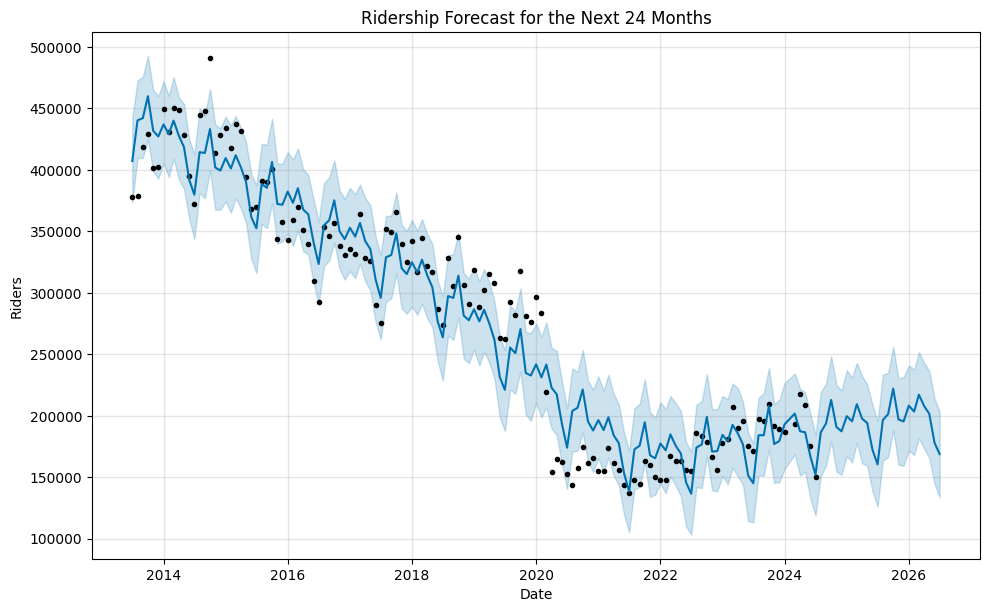

In [13]:
# Visualize the forecasted results
model.plot(forecast)
plt.title('Ridership Forecast for the Next 24 Months')
plt.xlabel('Date')
plt.ylabel('Riders')
plt.show()


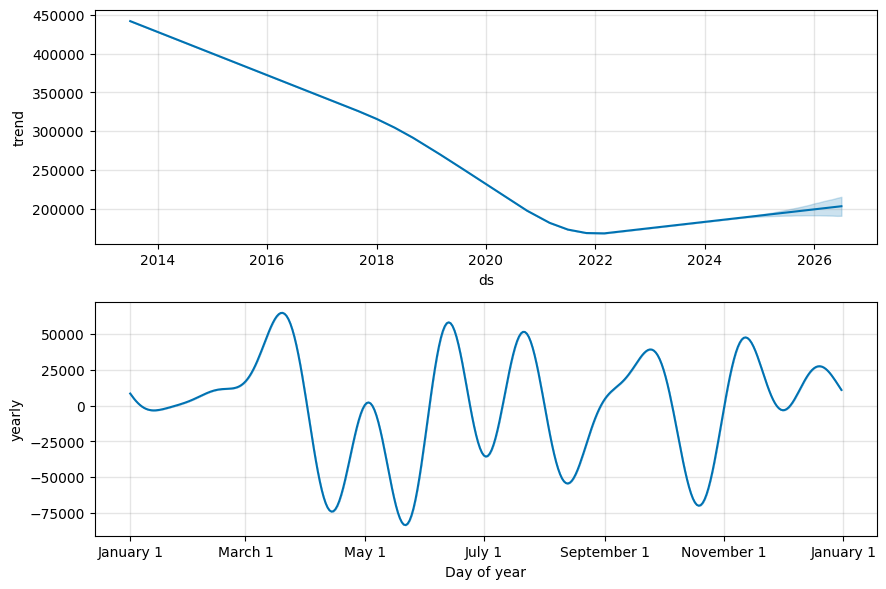

In [14]:
# You can also visualize the components (trend, yearly seasonality, etc.)
model.plot_components(forecast)
plt.show()